<a href="https://colab.research.google.com/github/pauljohnson1990/Deep-Learning-Brain-Tumour-Detection/blob/main/brain_tumour_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

Go to the Kaggle website and sign in to your account.
Click on your profile picture in the top right corner of the page and select "Account" from the drop-down menu.
Scroll down to the "API" section and click on the "Create New API Token" button. This will download a file called "kaggle.json" to your local machine.
Upload the "kaggle.json" file to your Colab notebook. You can do this in several ways, such as using the Colab file uploader or mounting Google Drive in Colab and copying the file to a directory.

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

brain-mri-images-for-brain-tumor-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/brain-mri-images-for-brain-tumor-detection.zip -d /content/

Archive:  /content/brain-mri-images-for-brain-tumor-detection.zip
  inflating: /content/brain_tumor_dataset/no/1 no.jpeg  
  inflating: /content/brain_tumor_dataset/no/10 no.jpg  
  inflating: /content/brain_tumor_dataset/no/11 no.jpg  
  inflating: /content/brain_tumor_dataset/no/12 no.jpg  
  inflating: /content/brain_tumor_dataset/no/13 no.jpg  
  inflating: /content/brain_tumor_dataset/no/14 no.jpg  
  inflating: /content/brain_tumor_dataset/no/15 no.jpg  
  inflating: /content/brain_tumor_dataset/no/17 no.jpg  
  inflating: /content/brain_tumor_dataset/no/18 no.jpg  
  inflating: /content/brain_tumor_dataset/no/19 no.jpg  
  inflating: /content/brain_tumor_dataset/no/2 no.jpeg  
  inflating: /content/brain_tumor_dataset/no/20 no.jpg  
  inflating: /content/brain_tumor_dataset/no/21 no.jpg  
  inflating: /content/brain_tumor_dataset/no/22 no.jpg  
  inflating: /content/brain_tumor_dataset/no/23 no.jpg  
  inflating: /content/brain_tumor_dataset/no/24 no.jpg  
  inflating: /content/

In [ ]:
!rm -r /content/yes
!rm -r /content/no

In [ ]:
data_path='/content/brain_tumor_dataset'

In [ ]:
categories=os.listdir(data_path)
categories

['no', 'yes']

In [ ]:
labels=np.array([0,1])

In [ ]:
labels_dict=dict(zip(categories,labels))

In [ ]:
labels_dict

{'no': 0, 'yes': 1}

In [ ]:
img_size=100
data = []
target = []
for category in categories:
    folder_path = os.path.join(data_path, category)
    sample_names=os.listdir(folder_path)
    for sample_name in sample_names:
        img_path=os.path.join(folder_path,sample_name)
        img=cv2.imread(img_path)
        try:
            gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # gray image conversion
            resized = cv2.resize(gray_img,(img_size,img_size)) # resize every image to uniform size
            data.append(resized)
            target.append(labels_dict[category])
        except Exception as e:
            print("Exception",e)     

no
no
no
no


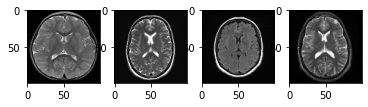

In [ ]:
plt.figure()
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(data[i],cmap='gray')
    print(categories[target[i]])
plt.show()

In [ ]:
data = np.array(data)/255 # Scaling
data = np.reshape(data,(data.shape[0],img_size,img_size,1))
target = np.array(target)

In [ ]:
data.shape

(253, 100, 100, 1)

In [ ]:
target.shape

(253,)

In [ ]:
from keras.utils import np_utils
new_target = np_utils.to_categorical(target)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
np.save('/content/drive/MyDrive/Data Science Projects/Brain_tumour_detection/data',data)
np.save('/content/drive/MyDrive/Data Science Projects/Brain_tumour_detection/target',new_target)